In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [13]:
NewUFOs_cleaned=pd.read_csv("NewUFOs_cleaned.csv")
Cities=pd.read_csv("Cities.csv")
Hours=pd.read_csv("Hours.csv")
Months=pd.read_csv("Months.csv")
ufo_sightings=pd.read_csv("ufo_sightings.csv")
shapes=pd.read_csv("shapes.csv")
Years=pd.read_csv("Years.csv")
UFOs=pd.read_csv("UFOs.csv")
onehot=pd.read_csv("onehot.csv")

In [24]:
onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60632 entries, 0 to 60631
Data columns (total 95 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     60632 non-null  int64  
 1   Unnamed: 0       60632 non-null  int64  
 2   Country          60632 non-null  object 
 3   Duration         60632 non-null  float64
 4   Comments         60632 non-null  object 
 5   Latitude         60632 non-null  float64
 6   Longitude        60632 non-null  float64
 7   Year             60632 non-null  int64  
 8   Month            60632 non-null  int64  
 9   Day              60632 non-null  int64  
 10  Hour             60632 non-null  int64  
 11  Minute           60632 non-null  int64  
 12  Shape_count      60632 non-null  int64  
 13  City_count       60632 non-null  int64  
 14  Country_count    60632 non-null  int64  
 15  Year_count       60632 non-null  int64  
 16  State_AK         60632 non-null  int64  
 17  State_AL    

<Axes: >

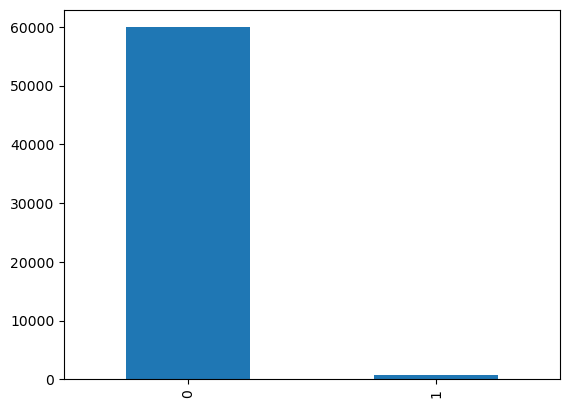

In [28]:
onehot['State_NV'].value_counts().plot(kind='bar')

In [29]:
onehot.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Country', 'Duration', 'Comments',
       'Latitude ', 'Longitude ', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Shape_count', 'City_count', 'Country_count', 'Year_count', 'State_AK',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY', 'Shape_changed', 'Shape_changing',
       'Shape_chevron', 'Shape_cigar', 'Shape_circle', 'Shape_cone',
      

In [43]:
cols=[ 'Duration', 'Latitude ', 'Longitude ', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Shape_count', 'City_count', 'Country_count', 'Year_count', 'State_AK',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY', 'Shape_changed', 'Shape_changing',
       'Shape_chevron', 'Shape_cigar', 'Shape_circle', 'Shape_cone',
       'Shape_crescent', 'Shape_cross', 'Shape_cylinder', 'Shape_delta',
       'Shape_diamond', 'Shape_disk', 'Shape_egg', 'Shape_fireball',
       'Shape_flare', 'Shape_flash', 'Shape_formation', 'Shape_hexagon',
       'Shape_light', 'Shape_other', 'Shape_oval', 'Shape_pyramid',
       'Shape_rectangle', 'Shape_round', 'Shape_sphere', 'Shape_teardrop',
       'Shape_triangle', 'Shape_unknown']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(onehot[cols], 
                                                    onehot['Hour'], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [48]:
from sklearn.ensemble import RandomForestClassifier



for trees in range(1,100,10):

    rf = RandomForestClassifier(
                                # setting the amount of trees in the forest
                                n_estimators = trees,

                                # the max depth of any tree
                                max_depth = 10,

                                # the minimum number of sample that must be in a leaf
                                min_samples_leaf=5,

                                # wether or not to use botstrapping, or all of the dataset on each tree
                                bootstrap=True,

                                # adding weights to each class, can be user defined
                                # or automatically calculated due to the distribution of classes
                                # balanced_subsample calculates wieghts for each sub sample of data each tree receives
                                class_weight = 'balanced_subsample',

                                random_state = 42
                                       ) 

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)


    print(f"Accuracy of the model:{metrics.accuracy_score(y_test, y_pred).round(4)}    Number of trees = {trees}")


# Displaying precision and recall figures
print(classification_report(y_test, 
                        predictions,
                        target_names=["Hour"]))


# PLotting the confusion matrix
predictions = rf.predict(X_test)

cm = confusion_matrix(y_test, 
                      predictions, 
                      labels=rf.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Hour')
                             )

disp.plot();

Accuracy of the model:0.0866    Number of trees = 1
Accuracy of the model:0.5153    Number of trees = 11
Accuracy of the model:0.6148    Number of trees = 21
Accuracy of the model:0.7501    Number of trees = 31
Accuracy of the model:0.7626    Number of trees = 41
Accuracy of the model:0.7589    Number of trees = 51
Accuracy of the model:0.7599    Number of trees = 61
Accuracy of the model:0.7684    Number of trees = 71
Accuracy of the model:0.7741    Number of trees = 81
Accuracy of the model:0.7711    Number of trees = 91


NameError: name 'predictions' is not defined

In [49]:
rf.feature_names_in_

array(['Duration', 'Latitude ', 'Longitude ', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'Shape_count', 'City_count', 'Country_count',
       'Year_count', 'State_AK', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
       'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND',
       'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY', 'Shape_changed', 'Shape_changing',
       'Shape_chevron', 'Shape_cigar', 'Shape_circle', 'Shape_cone',
       'Shape_crescent', 'Shape_cross', 'Shape_cylin

In [50]:
rf.feature_importances_

array([2.43026214e-02, 2.41899747e-02, 2.37433374e-02, 2.58669136e-02,
       3.72685571e-02, 2.09656686e-02, 6.59177373e-01, 2.56459332e-02,
       2.26240870e-02, 2.21861871e-02, 0.00000000e+00, 2.17644691e-02,
       5.02455318e-04, 1.45709329e-03, 3.13108287e-04, 2.01400506e-03,
       3.54184607e-03, 1.72646940e-03, 6.78795349e-04, 0.00000000e+00,
       2.10199851e-04, 2.20283419e-03, 1.11901887e-03, 4.64366513e-04,
       5.24509732e-04, 6.48230852e-04, 1.32874159e-03, 1.59221473e-03,
       6.94339272e-04, 9.86892513e-04, 8.89046564e-04, 1.00401090e-03,
       7.50311851e-04, 6.67807307e-04, 1.68450504e-03, 7.59212309e-04,
       9.13239756e-04, 3.45368441e-04, 4.60642226e-04, 1.43676192e-03,
       3.14521130e-04, 3.86507463e-04, 4.76135482e-04, 9.85897443e-04,
       9.66759382e-04, 1.55462524e-03, 1.45123646e-03, 1.69640579e-03,
       7.85954296e-04, 9.47017192e-04, 1.25404048e-03, 1.82090274e-04,
       8.84166354e-04, 4.54878403e-04, 1.03522471e-03, 2.13724418e-03,
      

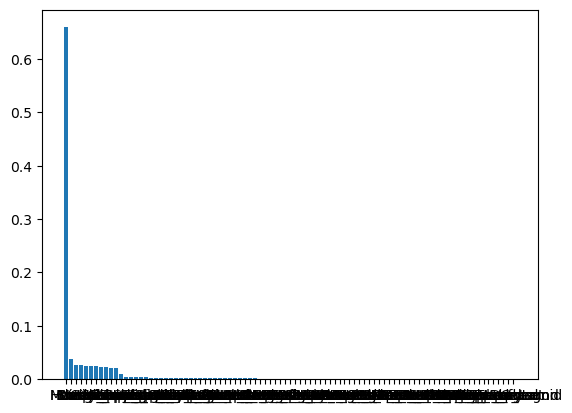

In [51]:
f_i = list(zip(rf.feature_names_in_,rf.feature_importances_))
f_i.sort(key = lambda x : x[1],reverse=True)
plt.bar([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
# Takes a long time.  Is it necessary?
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [55]:
trees  = gb.n_estimators

print(f"Accuracy of the model:{metrics.accuracy_score(y_test, y_pred).round(4)}    Number of trees = {trees}")


# Displaying precision and recall figures
print(classification_report(y_test, 
                        y_pred,
                        target_names=["Shape_disk"]))


# PLotting the confusion matrix

cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=gb.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Shape_disk')
                             )

disp.plot();

Accuracy of the model:1.0    Number of trees = 100


ValueError: Number of classes, 24, does not match size of target_names, 1. Try specifying the labels parameter